In [10]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from nn_tools import L_layer_model

In [11]:
# load dataset
data = pd.read_csv("data/auto-mpg.data-original", delim_whitespace = True, header = None)
# Add column headings
data.columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [12]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [13]:
# Converting labels to integer values
le = preprocessing.LabelEncoder()
labels = data.iloc[:, 8]
le.fit(labels)
data.iloc[:, 8] = le.transform(labels)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,50
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,37
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,235
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,14
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,164


In [14]:
# get shape of data
number_of_nan = pd.isnull(data).sum().sum() # get number of nan values
print("The Shape of the data: {} x {}".format(data.shape[0], data.shape[1]))
print("Number of NaN values: {}".format(number_of_nan))

The Shape of the data: 406 x 9
Number of NaN values: 14


In [15]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
data_dropna = data.dropna()
for cn in column_names:
    data[cn] = data[cn].fillna(np.median(data_dropna[cn]))
    
print("Finished converting Na values to Median values")

number_of_nan = pd.isnull(data).sum().sum() # get number of nan values
print("The number of Na values remaining in the data dataframe is: {}".format(number_of_nan))

Finished converting Na values to Median values
The number of Na values remaining in the data dataframe is: 0


In [30]:
layers = [8, 1]

In [31]:
X = np.array(data_dropna.iloc[:, 1:].T)
Y = np.array(data_dropna.iloc[:, 0]).reshape(1, X.shape[1])

# Normalize
X = X / X.max(axis = 1).reshape(X.shape[0], 1)
Y = Y / Y.max()
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (8, 392)
Y shape:  (1, 392)


Cost after iteration 0: 0.693531
Cost after iteration 100: 0.670799
Cost after iteration 200: 0.661556
Cost after iteration 300: 0.657543
Cost after iteration 400: 0.655644
Cost after iteration 500: 0.654644
Cost after iteration 600: 0.654049
Cost after iteration 700: 0.653651
Cost after iteration 800: 0.653358
Cost after iteration 900: 0.653126
Cost after iteration 1000: 0.652933
Cost after iteration 1100: 0.652768
Cost after iteration 1200: 0.652623
Cost after iteration 1300: 0.652494
Cost after iteration 1400: 0.652377
Cost after iteration 1500: 0.652269
Cost after iteration 1600: 0.652170
Cost after iteration 1700: 0.652078
Cost after iteration 1800: 0.651991
Cost after iteration 1900: 0.651909
Cost after iteration 2000: 0.651831
Cost after iteration 2100: 0.651757
Cost after iteration 2200: 0.651685
Cost after iteration 2300: 0.651616
Cost after iteration 2400: 0.651550
Cost after iteration 2500: 0.651486
Cost after iteration 2600: 0.651423
Cost after iteration 2700: 0.651363
Cost

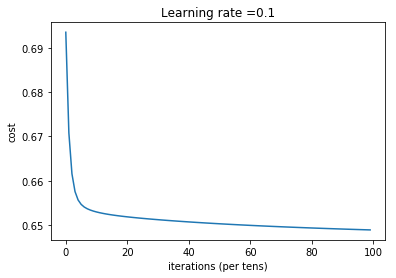

In [39]:
parameters = L_layer_model(X, Y, layers, learning_rate = 0.1, num_iterations = 10000, print_cost = True)

In [38]:
parameters

{'W1': array([[-0.50344888, -0.66328771, -0.52909479, -0.58288567,  0.30557069,
          0.48007141,  0.51789334,  0.12317465]]),
 'b1': array([[ 0.24198411]])}